In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_manhattan = {
    'Ride-hailing': pd.read_parquet('Manhattan/kc_dataset_df_15min.parquet').values,
    'Ride-splitting': pd.read_parquet('Manhattan/rs_dataset_df_15min.parquet').values
} 

data_beijing = {
    'Ride-hailing (Express)': pd.read_parquet('Beijing/kc_dataset_df_15min.parquet').values,
    'Ride-splitting': pd.read_parquet('Beijing/rs_dataset_df_15min.parquet').values,
    'Ride-hailing (Premier)': pd.read_parquet('Beijing/zc_dataset_df_15min.parquet').values
}
print(data_manhattan['Ride-hailing'].shape)
print(data_beijing['Ride-splitting'].shape)

(8640, 2209)
(2160, 2667)


In [3]:

max_number_show = 5

def init_number_stat_dict():
    number_stat = {
        str(i):0 for i in range(max_number_show + 1)
    }
    number_stat[f'>={max_number_show+1}'] = 0
    return number_stat

for idx, array_dict in enumerate([data_manhattan, data_beijing]):
    number_stat_dict = {}
    for k, array in array_dict.items():
        number_stat = init_number_stat_dict()
        total_size = array.size
        for i in range(max_number_show+1):
            number_stat[str(i)] = np.sum(array == i)*100.0/total_size
        number_stat[f'>={max_number_show+1}'] += np.sum(array >= max_number_show+1)*100.0/total_size
        number_stat_dict[k] = number_stat.copy()
    pd.DataFrame(number_stat_dict).to_csv(f'number_distribution_{idx}.csv')

In [ ]:


def plot_number_distribution(array_dict, max_number_show=5, title=None, fig_size=(4, 4,)):
    title = title or 'Number distribution'
    assert isinstance(max_number_show, int)
    def init_number_stat_dict():
        number_stat = {
            str(i):0 for i in range(max_number_show + 1)
        }
        number_stat[f'>={max_number_show+1}'] = 0
        return number_stat
    
    number_stat_dict = {}
    for k, array in array_dict.items():
        number_stat = init_number_stat_dict()
        total_size = array.size
        for i in range(max_number_show+1):
            number_stat[str(i)] = np.sum(array == i)*100.0/total_size
        number_stat[f'>={max_number_show+1}'] += np.sum(array >= max_number_show+1)*100.0/total_size
        number_stat_dict[k] = number_stat.copy()
    print(number_stat_dict)
    color_set = ['#DE66C2', '#5096DE', '#61DE45', '#DEA13A']
    # 绘制簇型柱状图
    fig, ax = plt.subplots(figsize=fig_size)
    bar_width = 0.3
    index = np.arange(max_number_show+2)
    for idx, (k, number_stat) in enumerate(number_stat_dict.items()):
        ax.bar(index, list(number_stat.values()), bar_width, label=k, alpha=0.5, color=color_set[idx])
        index = index + bar_width
    ax.set_xlabel('O-D demands (count of trips/time interval)')
    ax.set_ylabel('Percentage')
    # ax.set_title(title)
    ax.set_xticks(np.arange(max_number_show+2))
    ax.set_xticklabels([str(i) for i in range(max_number_show+1)] + [f'>={max_number_show+1}'])
    ax.set_yticks(np.arange(0, 101, 20))
    ax.set_yticklabels([f'{i}%' for i in range(0, 101, 20)])
    
    ax.legend()
    # plt.show()
    plt.savefig(f'{title}.svg')
    
    

{'Ride-hailing': {'0': 49.49884736630143, '1': 26.604070324542764, '2': 12.116436834284602, '3': 5.619262869919038, '4': 2.7598980682970184, '5': 1.4344908275354469, '6': 0.7814300990154008, '7': 0.4474440694913136, '8': 0.2664597480870447, '9': 0.16126456415170326, '10': 0.10191434404032829, '>=11': 0.20848088433390272}, 'Ride-splitting': {'0': 93.27922551347748, '1': 5.934449166076463, '2': 0.6405970087072449, '3': 0.10517782499409796, '4': 0.02711466622227777, '5': 0.008505881209293282, '6': 0.0027427127164659972, '7': 0.0013887152994764543, '8': 0.00045133247232984763, '9': 0.00019094835367801247, '10': 0.00010415364746073408, '>=11': 5.207682373036704e-05}}


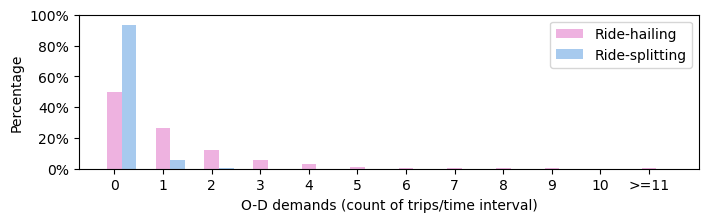

In [10]:

# plot_number_distribution(data_manhattan, title='Manhattan number distribution')
# plot_number_distribution(data_beijing, title='Beijing number distribution')
data_beijing2 = {
    'Ride-hailing': pd.read_parquet('Beijing/kc_dataset_df_15min.parquet').values,
    'Ride-splitting': pd.read_parquet('Beijing/rs_dataset_df_15min.parquet').values,
}
plot_number_distribution(data_beijing2, title='Beijing number distribution', max_number_show=10,fig_size=(8, 2,))
    

In [6]:
# 计算变异系数
def calculate_cv(df):
    """
    根据时间维度计算变异系数 (Coefficient of Variation, CV)
    :param df: 输入的时间序列数据，形状为 (time_len, n_vertex)
    :return: 每个顶点的变异系数，形状为 (n_vertex,)
    """
    df = df+1e-6
    mean_values = df.mean(axis=0)  # 按列计算均值
    std_values = df.std(axis=0)   # 按列计算标准差
    cv_values = std_values / mean_values  # 计算变异系数
    return cv_values

print("Manhattan")
for k,v in data_manhattan.items():
    print('\t', k, calculate_cv(v).mean())
print("Beijing")
for k,v in data_beijing.items():
    print('\t', k, calculate_cv(v).mean())


Manhattan
	 Ride-hailing 1.646660460622047
	 Ride-splitting 2.9750233506004697
Beijing
	 Ride-hailing (Express) 1.337776820978181
	 Ride-splitting 4.3176005051747754
	 Ride-hailing (Premier) 8.99663602728545
